In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import copy

# Функція Швефеля
def schwefel(x, y):
    return 837.9658 - (x * np.sin(np.sqrt(abs(x))) + y * np.sin(np.sqrt(abs(y))))

# Функція Drop-Wave
def drop_wave(x, y):
    numerator = 1 + np.cos(12 * np.sqrt(x**2 + y**2))
    denominator = 0.5 * (x**2 + y**2) + 2
    return -numerator / denominator


min_schwefel=(420.9687,420.9687,0)
min_drop_wave=(0,0,-1)
gen=40
bounds_schwefel=[-500,500]
bounds_drop_wave=[-5.12,5.12]
temp = [0,0,0]
d=1
n_f=0

# Функція для відображення графіків
def plot_function(func, bounds, title):
    x = np.linspace(bounds[0], bounds[1], 400)
    y = np.linspace(bounds[0], bounds[1], 400)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Початкова популяція
def initialize_population(pop_size, bounds):
    population=[]
    for i in range(pop_size):
            temp[0] = random.uniform(bounds[0], bounds[1])
            temp[1] = random.uniform(bounds[0], bounds[1])
            population.append(copy.deepcopy(temp))
    return population

# Фітнес-функція
def fitness(individual, func):
    global n_f
    n_f += 1  
    if func == 'schwefel':
        return schwefel(individual[0], individual[1])
    elif func == 'drop_wave':
        return drop_wave(individual[0], individual[1])


# Ранговий відбір
def ranked_selection(pop_size, count=1):
    def select_one():
        Roulette_size = int(pop_size * (pop_size + 1) / 2)
        ball = random.randint(1, Roulette_size)
        choice = pop_size
        check = pop_size
        while check < ball:
            choice -= 1
            check += choice
        return pop_size - choice

    if count == 1:
        return select_one()
    else:
        a = select_one()
        b = select_one()
        while b == a:
            b = select_one()
        return [a, b]

# Турнірний відбір
def tournament_selection(population, tournament_size=3, count=1):
    population = list(population)
    def select_one():
        selected = random.sample(population, tournament_size)
        return np.argmin([ind[2] for ind in selected])

    if count == 1:
        return select_one()
    else:
        a = select_one()
        b = select_one()
        while b == a:
            b = select_one()
        return [a, b]


#  Рандомний відбір
def random_selection(population, count=1):
    if count == 1:
        return random.randint(0, len(population) - 1)
    else:
        return random.sample(range(len(population)), 2)


def crossover(p1,p2,func,bounds):
    t=[0,0,0]
    betta_1=random.uniform(-1*d,1+d)
    betta_2=random.uniform(-1*d,1+d)
    t[0]=betta_1*p1[0]+(1-betta_1*p2[0])
    t[1]=betta_2*p1[1]+(1-betta_2*p2[1])
    if np.abs(t[0])>np.abs(bounds[0]):
        t[0]=random.uniform(bounds[0],bounds[1])
    if np.abs(t[1])>np.abs(bounds[0]):
        t[1]=random.uniform(bounds[0],bounds[1])
    return t

def mutation(p, bounds, func):
    t=[0,0,0]
    mutating_element=np.random.normal(loc=0, scale=(bounds[1]-bounds[0])/6, size=2)
    t[0]=p[0]+mutating_element[0]
    t[1]=p[1]+mutating_element[1]
    if np.abs(t[0])>np.abs(bounds[0]):
        t[0]=random.uniform(bounds[0],bounds[1])
    if np.abs(t[1])>np.abs(bounds[0]):
        t[1]=random.uniform(bounds[0],bounds[1])
    return p



def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
def evaluate_minimum(best, true_minimum, tolerance=0.3):
    distance = euclidean_distance(best, true_minimum)
    found_minimum = int(distance <= tolerance)
    return distance, found_minimum



# Основна функція генетичного алгоритму
def genetic_algorithm(func, bounds, pop_size=50, generations=100, cross_rate=0.7, mutation_rate=0.1, selection_method="ranked"):
    global n_f 
    n_f = 0
    population = np.array(initialize_population(pop_size, bounds))

    for ind in population:
        ind[2] = fitness(ind, func)

    population = population[population[:,2].argsort()]
    n_cross=int(np.floor(pop_size*cross_rate))
    n_mutate= int(pop_size*mutation_rate)
    n_selected = pop_size-n_mutate-n_cross

    for _ in range(generations):
        new_population = []

        # selected
        for k in range(n_selected):
            new_population.append(population[k])
        k=0
        #cross
        for k in range(n_cross):
            if selection_method == 'ranked':
                points = ranked_selection(pop_size,2)
            elif selection_method == 'tournament':
                points = tournament_selection(population, 3, 2)
            elif selection_method == 'random':
                points = random_selection(population,2)
            
            new_population.append(crossover(population[points[0]], population[points[1]], func, bounds))
        k=0
        for k in range(n_mutate):
            if selection_method == 'ranked':
                point = ranked_selection(pop_size)
            elif selection_method == 'tournament':
                point = tournament_selection(population)
            elif selection_method == 'random':
                point = random_selection(population)
            
            new_population.append(mutation(population[point], bounds, func))

        population=np.array(copy.deepcopy(new_population))
        
        for ind in population:
            ind[2] = fitness(ind, func)
        population = population[population[:,2].argsort()]

    #best_solution = population[0]
    #dist  = euclidean_distance(best_solution, optimal_solution)
    return population, n_f

In [232]:

bounds_levi=[-100,100]
min_levi=[1,1]
accuracy=0
stability=0
for i in range(0,200):
    print(i)
    test,serv=genetic_algorithm("drop_wave", bounds_drop_wave, pop_size=200, generations=50,cross_rate=0.7, mutation_rate=0.1, selection_method="ranked")
    dist=euclidean_distance(test[0],min_drop_wave)
    accuracy+=dist
    if dist<=0.4:
        stability+=1
accuracy=accuracy/200
stability=stability
print(accuracy)
print(stability)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0.2260709729922025
119


In [1]:
test,serv=genetic_algorithm("drop_wave", bounds_drop_wave, pop_size=200, cross_rate=0.7, mutation_rate=0.1, selection_method="random")
print(test)
print(serv)
drop_wave_test_x=[]
drop_wave_test_y=[]
drop_wave_test_z=[]
for i in test:
    drop_wave_test_x.append(i[0])
    drop_wave_test_y.append(i[1])
    drop_wave_test_z.append(i[2])
temp_exp={
    "X": drop_wave_test_x,
    "Y": drop_wave_test_y,
    "Z": drop_wave_test_z
}
export_test=pd.DataFrame(temp_exp)
export_test.to_excel("output1.xlsx", index=False)


NameError: name 'genetic_algorithm' is not defined

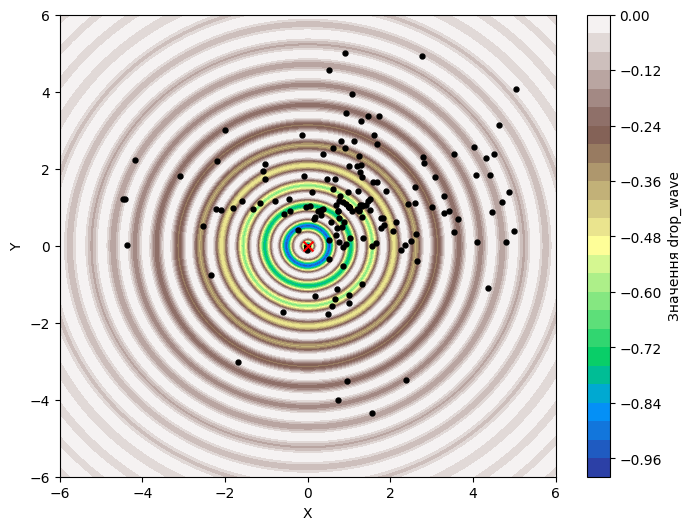

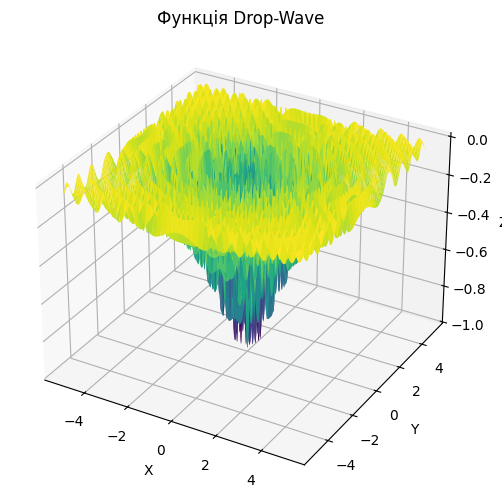

In [230]:
x = np.linspace(-6, 6, 500)  # Діапазон X
y = np.linspace(-6, 6, 500)  # Діапазон Y
X, Y = np.meshgrid(x, y)     # Створюємо координатну сітку
Z = drop_wave(X, Y)               # Обчислюємо значення функції

# Будуємо графік
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=30, cmap='terrain')  # 'terrain' - кольори, схожі на фізичну карту
plt.colorbar(contour, label="Значення drop_wave")  # Додаємо кольорову шкалу
plt.xlabel("X")
plt.ylabel("Y")
for i in test:
    plt.scatter(i[0],i[1], color="black", marker=".", s=50)
plt.scatter(0, 0, color="Red", marker="x", s=50)
# Відображення функцій

plot_function(drop_wave, bounds_drop_wave, "Функція Drop-Wave")

In [180]:
test,serv=genetic_algorithm("schwefel", bounds_schwefel, pop_size=200, cross_rate=0.7, mutation_rate=0.1, selection_method="ranked")
print(test)
print(serv)
schwefel_test_x=[]
schwefel_test_y=[]
schwefel_test_z=[]
for i in test:
    schwefel_test_x.append(i[0])
    schwefel_test_y.append(i[1])
    schwefel_test_z.append(i[2])
temp_exp={
    "X": schwefel_test_x,
    "Y": schwefel_test_y,
    "Z": schwefel_test_z
}
export_test=pd.DataFrame(temp_exp)
export_test.to_excel("output.xlsx", index=False)

[[ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+02  6.80284837e-01]
 [ 4.23092271e+02  4.21906155e+

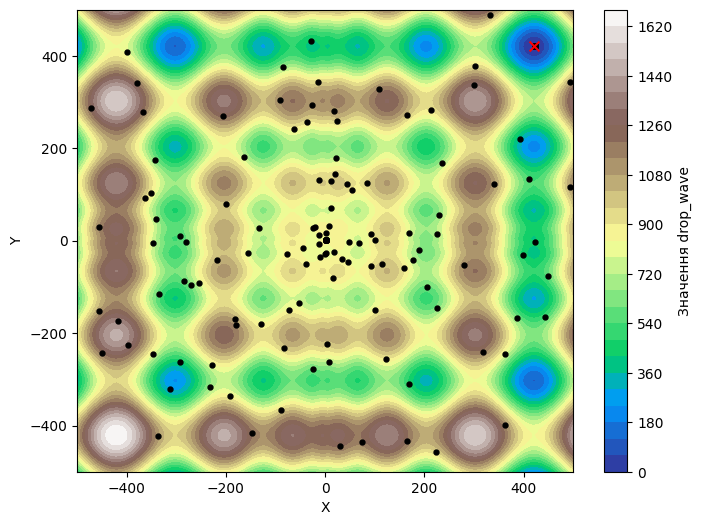

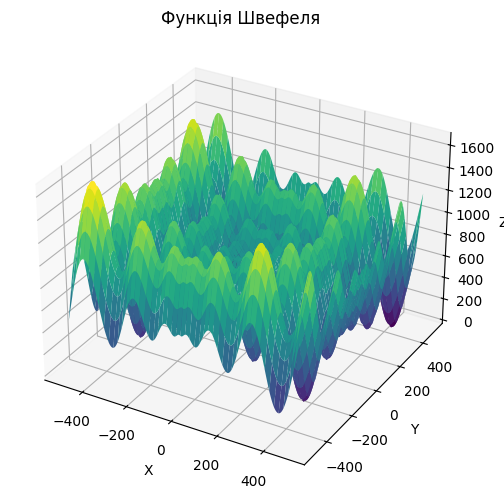

In [ ]:
x = np.linspace(-500, 500, 1000)  # Діапазон X
y = np.linspace(-500, 500, 1000)  # Діапазон Y
X, Y = np.meshgrid(x, y)     # Створюємо координатну сітку
Z = schwefel(X, Y)               # Обчислюємо значення функції

# Будуємо графік
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=30, cmap='terrain')  # 'terrain' - кольори, схожі на фізичну карту
plt.colorbar(contour, label="Значення schwefel")  # Додаємо кольорову шкалу
plt.xlabel("X")
plt.ylabel("Y")
for i in test:
    plt.scatter(i[0],i[1], color="black", marker=".", s=50)
plt.scatter(420.9687, 420.9687, color="Red", marker="x", s=50)
plot_function(schwefel, bounds_schwefel, "Функція Швефеля")

In [257]:
functions=["schwefel", "drop_wave"]
selection_methods = ["ranked", "tournament", "random"]
cross_mutation_rates=[[0.7, 0.1],[0.6,0.2],[0.8,0.1],[0.7, 0.2]]
def grid_test():
    temp_counter=[]
    temp_pop=[]
    temp_funcs=[]
    for func in functions:
        for rate in cross_mutation_rates:
            for method in selection_methods:
                if func=="schwefel":
                    bounds=bounds_schwefel
                else: 
                    bounds=bounds_drop_wave
                x, y=genetic_algorithm(func, bounds, pop_size=100, generations=40, cross_rate=rate[0], mutation_rate=rate[1], selection_method=method)
                temp_pop.append(x)
                temp_counter.append(y)
                temp_funcs.append(func)
    return temp_pop, temp_counter, temp_funcs

In [258]:
service_stability=[]
service_accuracy=[]
service_functions=[]
service_counter=[]
service_cross_rates=[]
service_mut_rates=[]
service_sel_rates=[]
service_method=[]

for func in functions:
        for rate in cross_mutation_rates:
            for method in selection_methods:
                service_functions.append(func)
                service_sel_rates.append(1-rate[0]-rate[1])
                service_cross_rates.append(rate[0])
                service_mut_rates.append(rate[1])
                service_method.append(method)
                service_stability.append(np.float64(0))
                service_accuracy.append(np.float64(0))
                service_counter.append(np.float64(0))
dict={
    "Target function": service_functions,
    "Selection rate": service_sel_rates,
    "Cross rate": service_cross_rates,
    "Mutation rate": service_mut_rates,
    "Selection method":service_method,
    "Stability": service_stability,
    "AvgDistance":service_accuracy,
    "Function counts": service_counter
    }
results_df=pd.DataFrame(dict)
print(results_df)

   Target function  Selection rate  Cross rate  Mutation rate  \
0         schwefel             0.2         0.7            0.1   
1         schwefel             0.2         0.7            0.1   
2         schwefel             0.2         0.7            0.1   
3         schwefel             0.2         0.6            0.2   
4         schwefel             0.2         0.6            0.2   
5         schwefel             0.2         0.6            0.2   
6         schwefel             0.1         0.8            0.1   
7         schwefel             0.1         0.8            0.1   
8         schwefel             0.1         0.8            0.1   
9         schwefel             0.1         0.7            0.2   
10        schwefel             0.1         0.7            0.2   
11        schwefel             0.1         0.7            0.2   
12       drop_wave             0.2         0.7            0.1   
13       drop_wave             0.2         0.7            0.1   
14       drop_wave       

In [259]:
dist=0
for i in range(100):
    pop,count,funcs =grid_test()
    print(i)
    for j in range(len(pop)):
        if funcs[j]=="schwefel":
            dist=euclidean_distance(pop[j][0],min_schwefel)
            #print(dist)
            if dist<=10:
                results_df.at[j,'Stability']+=1
                #print("a")
            results_df.at[j,'AvgDistance']=results_df.at[j,'AvgDistance']+dist
            results_df.at[j,'Function counts']=count[j]
            #print("b")
        if funcs[j]=="drop_wave":
            dist=euclidean_distance(pop[j][0],min_drop_wave)
            if dist<=0.5:
                results_df.at[j,'Stability']+=1
                #print("c")
            results_df.at[j,'AvgDistance']=results_df.at[j,'AvgDistance']+dist
            results_df.at[j,'Function counts']=count[j]
            #print("d")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [260]:
for i in range(24):
    results_df.at[i,"AvgDistance"]=results_df.at[i,"AvgDistance"]/100
    results_df.at[i,"Stability"]=results_df.at[i,"Stability"]/100

In [261]:
print(results_df)

   Target function  Selection rate  Cross rate  Mutation rate  \
0         schwefel             0.2         0.7            0.1   
1         schwefel             0.2         0.7            0.1   
2         schwefel             0.2         0.7            0.1   
3         schwefel             0.2         0.6            0.2   
4         schwefel             0.2         0.6            0.2   
5         schwefel             0.2         0.6            0.2   
6         schwefel             0.1         0.8            0.1   
7         schwefel             0.1         0.8            0.1   
8         schwefel             0.1         0.8            0.1   
9         schwefel             0.1         0.7            0.2   
10        schwefel             0.1         0.7            0.2   
11        schwefel             0.1         0.7            0.2   
12       drop_wave             0.2         0.7            0.1   
13       drop_wave             0.2         0.7            0.1   
14       drop_wave       

In [ ]:
results_df.to_excel("rezal.xlsx", index=False)

In [ ]:

for func in functions:
    for rate in cross_mutation_rates:
        for method in selection_methods:
        
            print(f"\n\nОптимізація функції {func} (cross_rate={rate[0]}, mutation_rate={rate[1]}, selection_method={method}):")
            if func=="schwefel":
                bounds=bounds_schwefel
                min=min_schwefel
            else: 
                bounds=bounds_drop_wave
                min=min_drop_wave
            pop, n_fit, func_best, func_dist, func_stable =genetic_algorithm(func, bounds, min, pop_size=200, cross_rate=rate[0], mutation_rate=rate[1], selection_method=method)
            
            print(f"Найкраща точка: ({func_best[0]}; {func_best[1]}), "
             f"Відхилення від мінімуму: {func_dist},"
          f"Стабільність: {func_stable}, "
          f"Кількість обчислень функції: {n_fit}")



Оптимізація функції schwefel (cross_rate=0.7, mutation_rate=0.1, selection_method=ranked):
Найкраща точка: (420.96874630504834; 420.96874659993665), Відхилення від мінімуму: 6.569407580180262e-05,Стабільність: 0.83, Кількість обчислень функції: 36200


Оптимізація функції schwefel (cross_rate=0.7, mutation_rate=0.1, selection_method=tournament):
Найкраща точка: (420.96874654447566; 420.96873899609824), Відхилення від мінімуму: 6.072136271962368e-05,Стабільність: 0.99, Кількість обчислень функції: 36200


Оптимізація функції schwefel (cross_rate=0.7, mutation_rate=0.1, selection_method=roulette):
Найкраща точка: (423.57133114198024; 416.79870352592303), Відхилення від мінімуму: 4.915542640952243,Стабільність: 0.0, Кількість обчислень функції: 36200


Оптимізація функції schwefel (cross_rate=0.7, mutation_rate=0.1, selection_method=random):
Найкраща точка: (421.0997097552385; 421.4882887266024), Відхилення від мінімуму: 0.5358507262101239,Стабільність: 0.34, Кількість обчислень функції